In [224]:
#SCRAPY PROJECT

In [2]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [90]:
microsoft=pd.read_csv('microsoft.csv')


In [4]:
microsoft.head(20)

,App_Name,Category,Comment_header,Comment_rating,ESRB_rating,Num_Rated,Num_Reviewed,Rating
0,iTunes,music,Don't bother...,1,Rating Board ESRB. Rated For ages 13 and up.,3758,"1-10 of 1,451 reviews",3.5
1,iTunes,music,NaN,1,Rating Board ESRB. Rated For ages 13 and up.,3758,"1-10 of 1,451 reviews",3.5
2,iTunes,music,iPod won't work with it,1,Rating Board ESRB. Rated For ages 13 and up.,3758,"1-10 of 1,451 reviews",3.5
3,iTunes,music,MICROSOFT STORE IS TRASH,1,Rating Board ESRB. Rated For ages 13 and up.,3758,"1-10 of 1,451 reviews",3.5
4,iTunes,music,Love it,5,Rating Board ESRB. Rated For ages 13 and up.,3758,"1-10 of 1,451 reviews",3.5
5,iTunes,music,Does no work,1,Rating Board ESRB. Rated For ages 13 and up.,3758,"1-10 of 1,451 reviews",3.5
6,iTunes,music,Outdated and Laggy,3,Rating Board ESRB. Rated For ages 13 and up.,3758,"1-10 of 1,451 reviews",3.5
7,iTunes,music,Does Not Install Apple Mobile Software and Others,1,Rating Board ESRB. Rated For ages 13 and up.,3758,"1-10 of 1,451 reviews",3.5
8,iTunes,music,Doesn't work,1,Rating Board ESRB. Rated For ages 13 and up.,3758,"1-10 of 1,451 reviews",3.5
9,iTunes,music,Terribad,1,Rating Board ESRB. Rated For ages 13 and up.,3758,"1-10 of 1,451 reviews",3.5


In [5]:
top10=microsoft.drop_duplicates('App_Name')

In [6]:
top10.head(10)

,App_Name,Category,Comment_header,Comment_rating,ESRB_rating,Num_Rated,Num_Reviewed,Rating
0,iTunes,music,Don't bother...,1,Rating Board ESRB. Rated For ages 13 and up.,3758,"1-10 of 1,451 reviews",3.5
10,AdBlock,productivity,Check the Acceptable Ads filter first! Great a...,5,Rating Board ESRB. Rated For all ages.,1112,1-10 of 688 reviews,3.5
20,World National Parks,personalization,Great,5,Rating Board ESRB. Rated For all ages.,74,1-10 of 24 reviews,4.5
30,Movie Maker 10 - Tell Your Story,photo/video,This absolutely blows. The old version was g...,1,Rating Board ESRB. Rated For all ages.,3428,1-10 of 694 reviews,4.0
40,Arduino IDE,developer/tools,Windows store security locks down tweaking,1,Rating Board ESRB. Rated For all ages.,217,1-10 of 109 reviews,4.0
50,Crackle,entertainment,Crackle rules!,5,Rating Board ESRB. Rated For all ages.,4834,1-10 of 828 reviews,3.5
60,Islands in the Sun,personalization,Very Beautiful,5,Rating Board ESRB. Rated For all ages.,55,1-10 of 21 reviews,4.5
70,Movie Edit Touch,photo/video,READ THIS,5,Rating Board ESRB. Rated For all ages.,1395,1-10 of 423 reviews,2.5
80,JAR File Opener,utilities/tools,used to open games,1,Rating Board ESRB. Rated For all ages.,764,1-10 of 325 reviews,2.5
90,Connected Devices,utilities/tools,Incredible,5,Rating Board ESRB. Rated For all ages.,162,1-10 of 107 reviews,4.0


In [7]:
top10=top10.drop(labels=['Comment_header', 'Comment_rating'], axis=1).reset_index().drop(labels=['index'], axis=1)

In [8]:
list(top10.Num_Reviewed)

['1-10 of 1,451 reviews',
 '1-10 of 688 reviews',
 '1-10 of 24 reviews',
 '1-10 of 694 reviews',
 '1-10 of 109 reviews',
 '1-10 of 828 reviews',
 '1-10 of 21 reviews',
 '1-10 of 423 reviews',
 '1-10 of 325 reviews',
 '1-10 of 107 reviews',
 '1-10 of 78 reviews',
 '1-10 of 2,054 reviews',
 '1-10 of 17 reviews',
 '1-10 of 509 reviews',
 '1-10 of 26 reviews',
 '1-10 of 59 reviews',
 '1-10 of 27 reviews',
 '1-10 of 62 reviews',
 '1-10 of 490 reviews',
 '1-10 of 114 reviews',
 '1-4 of 4 reviews',
 '1-10 of 1,125 reviews',
 '1-3 of 3 reviews',
 '1-10 of 125 reviews',
 '1-10 of 271 reviews',
 '1-7 of 7 reviews',
 '1-10 of 17 reviews',
 '1-8 of 8 reviews',
 '1-10 of 62 reviews',
 '1-10 of 50 reviews',
 '1-10 of 125 reviews',
 '1-10 of 72 reviews',
 '1-10 of 127 reviews',
 '1-10 of 370 reviews',
 '1-10 of 16 reviews',
 '1-10 of 10 reviews',
 '1-10 of 25 reviews',
 '1-10 of 10 reviews',
 '1-10 of 108 reviews',
 '1-10 of 304 reviews',
 '1-10 of 1,373 reviews',
 '1-10 of 19 reviews',
 '1-7 of 7 re

In [91]:
def extract(x):
    return list(map(lambda x: x[7:len(x)], x))

In [92]:
x=extract(microsoft.Num_Reviewed)

In [94]:
x

[' 1,451 reviews',
 ' 1,451 reviews',
 ' 1,451 reviews',
 ' 1,451 reviews',
 ' 1,451 reviews',
 ' 1,451 reviews',
 ' 1,451 reviews',
 ' 1,451 reviews',
 ' 1,451 reviews',
 ' 1,451 reviews',
 ' 688 reviews',
 ' 688 reviews',
 ' 688 reviews',
 ' 688 reviews',
 ' 688 reviews',
 ' 688 reviews',
 ' 688 reviews',
 ' 688 reviews',
 ' 688 reviews',
 ' 688 reviews',
 ' 24 reviews',
 ' 24 reviews',
 ' 24 reviews',
 ' 24 reviews',
 ' 24 reviews',
 ' 24 reviews',
 ' 24 reviews',
 ' 24 reviews',
 ' 24 reviews',
 ' 24 reviews',
 ' 694 reviews',
 ' 694 reviews',
 ' 694 reviews',
 ' 694 reviews',
 ' 694 reviews',
 ' 694 reviews',
 ' 694 reviews',
 ' 694 reviews',
 ' 694 reviews',
 ' 694 reviews',
 ' 109 reviews',
 ' 109 reviews',
 ' 109 reviews',
 ' 109 reviews',
 ' 109 reviews',
 ' 109 reviews',
 ' 109 reviews',
 ' 109 reviews',
 ' 109 reviews',
 ' 109 reviews',
 ' 828 reviews',
 ' 828 reviews',
 ' 828 reviews',
 ' 828 reviews',
 ' 828 reviews',
 ' 828 reviews',
 ' 828 reviews',
 ' 828 reviews',
 ' 8

In [95]:
def find(x):
    return list(map(lambda x: ''.join(re.findall(r'\d+', x)), x))

In [96]:
x1=find(x)

In [97]:
microsoft.Num_Reviewed=x1

In [98]:
microsoft.head(30)

,App_Name,Category,Comment_header,Comment_rating,ESRB_rating,Num_Rated,Num_Reviewed,Rating
0,iTunes,music,Don't bother...,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
1,iTunes,music,NaN,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
2,iTunes,music,iPod won't work with it,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
3,iTunes,music,MICROSOFT STORE IS TRASH,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
4,iTunes,music,Love it,5,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
5,iTunes,music,Does no work,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
6,iTunes,music,Outdated and Laggy,3,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
7,iTunes,music,Does Not Install Apple Mobile Software and Others,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
8,iTunes,music,Doesn't work,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
9,iTunes,music,Terribad,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5


In [56]:
top10['Category'].value_counts()>20`

personalization               True
productivity                  True
photo/video                   True
entertainment                 True
utilities/tools               True
music                         True
education                     True
social                        True
business                      True
news/weather                  True
security                     False
books/reference              False
developer/tools              False
shopping                     False
multimedia/design            False
personal/finance             False
kids/family/entertainment    False
travel                       False
sports                       False
health/fitness               False
lifestyle                    False
medical                      False
navigation/maps              False
food/dining                  False
Name: Category, dtype: bool

In [99]:
list_cat=["personalization", "productivity", "photo/video", "entertainment", "utilities/tools", "music", "education", "social", "business", "news/weather"]

In [100]:
microsoft_new=microsoft.loc[microsoft.Category.isin(list_cat)]

In [101]:
microsoft_new.to_csv('microsoft_new.csv')

In [86]:
top10_new

,App_Name,Category,ESRB_rating,Num_Rated,Num_Reviewed,Rating,User_interaction
0,iTunes,music,Rating Board ESRB. Rated For ages 13 and up.,3758.0,1451,3.5,10
1,AdBlock,productivity,Rating Board ESRB. Rated For all ages.,1112.0,688,3.5,10
2,World National Parks,personalization,Rating Board ESRB. Rated For all ages.,74.0,24,4.5,10
3,Movie Maker 10 - Tell Your Story,photo/video,Rating Board ESRB. Rated For all ages.,3428.0,694,4.0,10
5,Crackle,entertainment,Rating Board ESRB. Rated For all ages.,4834.0,828,3.5,10
6,Islands in the Sun,personalization,Rating Board ESRB. Rated For all ages.,55.0,21,4.5,10
7,Movie Edit Touch,photo/video,Rating Board ESRB. Rated For all ages.,1395.0,423,2.5,10
8,JAR File Opener,utilities/tools,Rating Board ESRB. Rated For all ages.,764.0,325,2.5,10
9,Connected Devices,utilities/tools,Rating Board ESRB. Rated For all ages.,162.0,107,4.0,10
10,10,10,10,10.0,10,10.0,10


In [18]:
top10.describe()

,Num_Rated,Rating
count,987.000000,987.000000
mean,2450.913880,3.983789
std,12897.952542,0.663249
min,1.000000,1.000000
25%,37.000000,3.500000
50%,154.000000,4.000000
75%,945.000000,4.500000
max,319171.000000,5.000000


In [236]:
top10['ESRB_rating'].value_counts(normalize='FALSE').sort_values()

Rating Board ESRB. Rated For ages 17 and up.    0.006079
Rating Board ESRB. Rated For ages 10 and up.    0.009119
 Potential violation                            0.038501
Rating Board ESRB. Rated For ages 13 and up.    0.102330
Rating Board ESRB. Rated For all ages.          0.843972
Name: ESRB_rating, dtype: float64

In [54]:
cat_new=top10.Category.value_counts()>20
type(cat_new)

pandas.core.series.Series

In [164]:
top10['Rating'].value_counts()

4.5    319
4.0    280
3.5    173
3.0     84
5.0     80
2.5     38
2.0     10
1.5      2
1.0      1
Name: Rating, dtype: int64

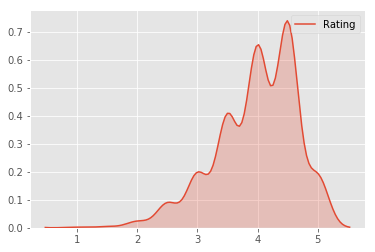

In [219]:
sns.kdeplot(top10['Rating'], shade=True, label='Rating')

C:\Users\Jensen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jensen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


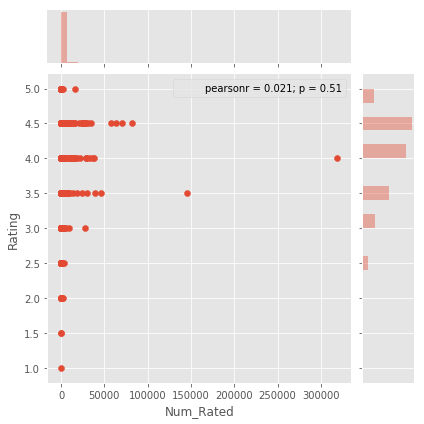

In [220]:
sns.jointplot(top10['Num_Rated'], top10['Rating'])

Text(0.5,1,'Average App Rating by Number of Ratings')

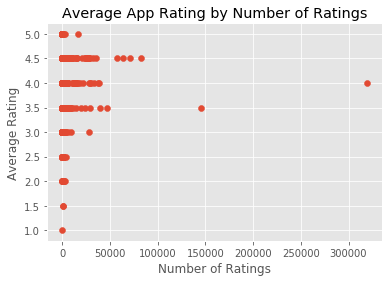

In [211]:
plt.scatter(top10['Num_Rated'], top10['Rating'])
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.title('Average App Rating by Number of Ratings')

C:\Users\Jensen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Jensen\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


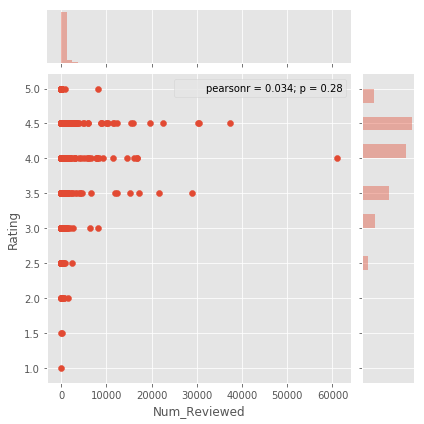

In [221]:
sns.jointplot(top10['Num_Reviewed'], top10['Rating'])

Text(0,0.5,'Average Rating')

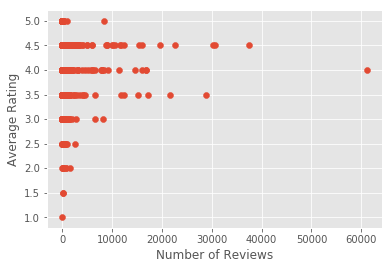

In [208]:
plt.scatter(top10['Num_Reviewed'], top10['Rating'])
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')

Text(0,0.5,'Number of Ratings')

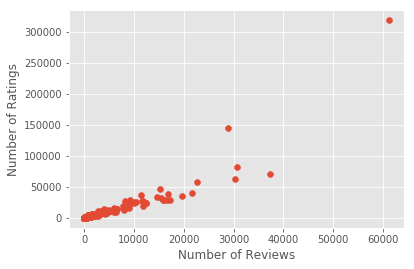

In [80]:
plt.scatter(top10['Num_Reviewed'], top10['Num_Rated'])
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Ratings')

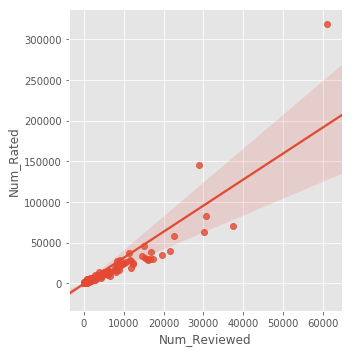

In [86]:
import seaborn as sns
sns.lmplot("Num_Reviewed","Num_Rated", top10)

In [201]:
print(top10['Category'].value_counts(normalize='FALSE').head(10)*100)
print('='*50)
print(top10['Category'].count())

personalization    20.364742
productivity       13.779129
photo/video        13.677812
entertainment      12.056738
utilities/tools    11.144883
music               6.382979
education           3.343465
social              3.242148
business            2.330294
news/weather        2.127660
Name: Category, dtype: float64
987


In [225]:
top10['Category'].value_counts().sort_values(ascending=False)

personalization              201
productivity                 136
photo/video                  135
entertainment                119
utilities/tools              110
music                         63
education                     33
social                        32
business                      23
news/weather                  21
security                      19
books/reference               18
developer/tools               18
shopping                      12
multimedia/design             12
kids/family/entertainment      6
personal/finance               6
sports                         5
travel                         5
health/fitness                 4
lifestyle                      4
medical                        3
navigation/maps                1
food/dining                    1
Name: Category, dtype: int64

In [39]:
category_filter=filter(top10['Category'].value_counts()>20, top10)
top10[top10.Category=='music' & top10.Category=='social']

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

Text(0.5,1,'Number of Apps by Category (n=987)')

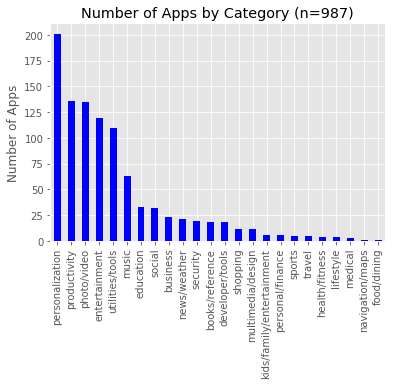

In [206]:
top10['Category'].value_counts().sort_values(ascending=False).plot.bar(color='b')
plt.ylabel('Number of Apps')
plt.title('Number of Apps by Category (n=987)')

(987, 6)


Text(0.5,1,'Average Rating by Category')

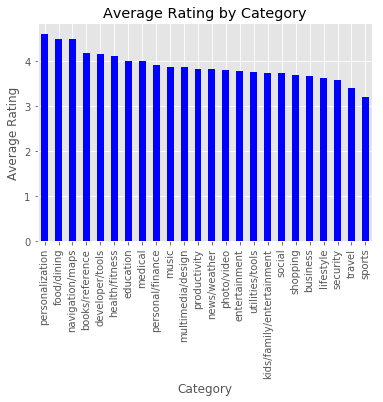

In [71]:
top10.groupby('Category')['Rating'].mean().sort_values(ascending=False).plot.bar(color='b')
plt.ylabel('Average Rating')
print(top10.shape)
plt.title('Average Rating by Category')

(987, 6)


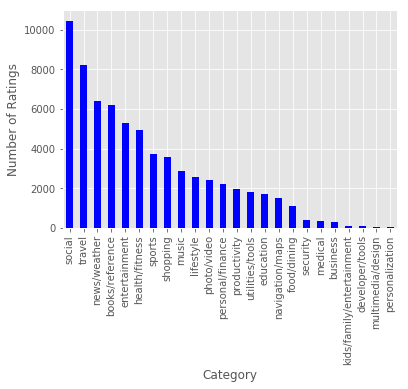

In [82]:
top10.groupby('Category')['Num_Rated'].mean().sort_values(ascending=False).plot.bar(color='b')
plt.ylabel('Number of Ratings')
print(top10.shape)

In [74]:
top10['Num_Reviewed']=top10['Num_Reviewed'].astype(int)

(987, 6)


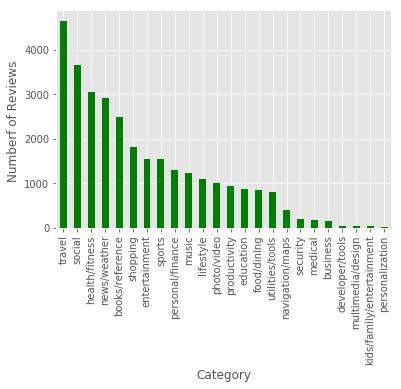

In [81]:
top10.groupby('Category')['Num_Reviewed'].mean().sort_values(ascending=False).plot.bar(color='g')
plt.ylabel('Numberf of Reviews ')
print(top10.shape)

Text(0,0.5,'Number of Ratings')

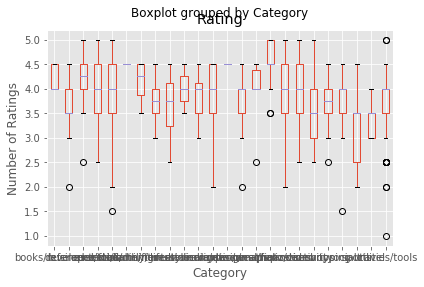

In [231]:
top10_box = top10[['Category', 'Rating']]
top10_box.boxplot(by='Category', column='Rating')
plt.ylabel('Number of Ratings')

(987, 6)


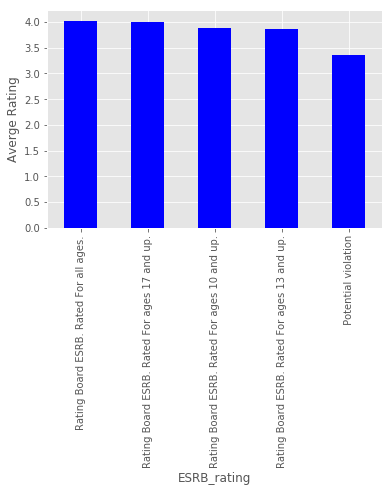

In [127]:
top10.groupby('ESRB_rating')['Rating'].mean().sort_values(ascending=False).plot.bar(color='b')
plt.ylabel('Averge Rating')
print(top10.shape)

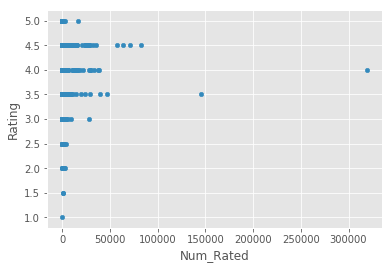

In [41]:
top10.plot.scatter(x='Num_Rated', y='Rating')

In [13]:
microsoft.dtypes

App_Name           object
Category           object
Comment_header     object
Comment_rating      int64
ESRB_rating        object
Num_Rated           int64
Num_Reviewed       object
Rating            float64
dtype: object

In [15]:
microsoft[['Comment_header']]=microsoft[['Comment_header']].astype('str')

In [18]:
from textblob import TextBlob

def sentiment_func(x):
    sentiment = TextBlob(x['Comment_header'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample=microsoft.apply(sentiment_func, axis=1)

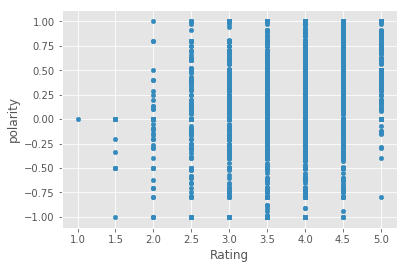

In [21]:
sample.plot.scatter('Rating', 'polarity')

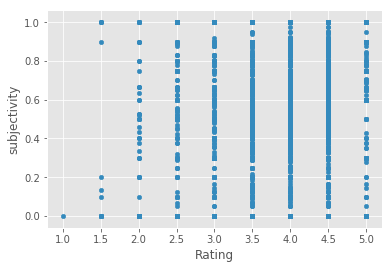

In [22]:
sample.plot.scatter('Rating', 'subjectivity')

In [107]:
social_df=microsoft.loc[microsoft.Category=="social",:]
social_df['Comment_header']=social_df['Comment_header'].astype(str)

C:\Users\Jensen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [108]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000)
# generate word cloud
wc.generate(''.join(social_df['Comment_header']))

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

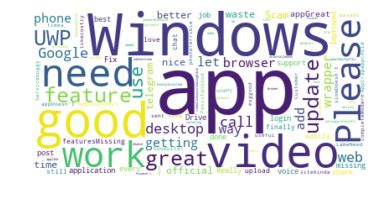

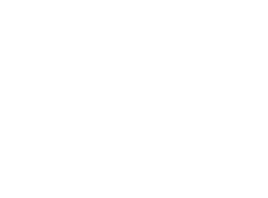

In [110]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()